In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten

In [2]:
class grayLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape):
        super().build(input_shape)

    def call(self, inputs):
        image = tf.image.rgb_to_grayscale(inputs)
        return image

In [7]:
reg = reg = keras.regularizers.L1L2(l1=0.0001, l2=0.0001)
prob = 0.2
from tensorflow.keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint, EarlyStopping
dataset=cifar10.load_data()



(x_train, y_train), (x_test, y_test) = dataset
data_number=10000
x_train = x_train[:data_number]
y_train = y_train[:data_number]
x_test = x_test[:data_number]
y_test = y_test[:data_number]
print(x_train.shape)
x_trainv = x_train/255
x_testv = x_test/255

x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')
num_classes=10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)
model= Sequential()
model.add(grayLayer(input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(30, activation='tanh',kernel_regularizer=reg))
model.add(Dropout(prob))
model.add(Dense(20, activation='sigmoid',kernel_regularizer=reg))
model.add(Dropout(prob))
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=reg))
model.summary()
earlystop = EarlyStopping(monitor='val_loss',mode='min',restore_best_weights=False,patience=20,verbose=1)

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99, epsilon=10e-09),metrics=['accuracy'])

history = model.fit(x_trainv, y_trainc,
                    batch_size=10,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

(10000, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gray_layer_1 (grayLayer)    (None, 32, 32, 1)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 30)                30750     
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None,

# 2)

## a)

In [12]:
loss_tracker = keras.metrics.Mean(name="loss")
class funcion1(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =10 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = 3*tf.math.sin(np.pi*x)


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [13]:
model = funcion1()
model.add(Dense(100, activation = "tanh",input_shape=(1,)))
model.add(Dense(50, activation = "tanh"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1))
model.summary()

Model: "funcion1_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 15)                765       
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 6031 (23.56 KB)
Trainable params: 6031 (23.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])
x=tf.linspace(-1,1,30)
history = model.fit(x,epochs=10000,verbose=0)

1/1 [==============================] - 0s 86ms/step


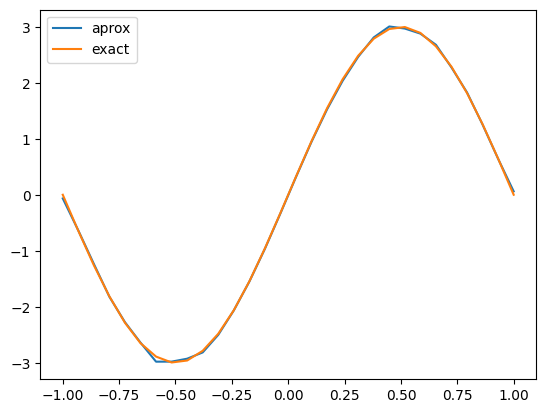

In [15]:
a=model.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x,3*tf.math.sin(np.pi*x), label="exact")

plt.legend()
plt.show()

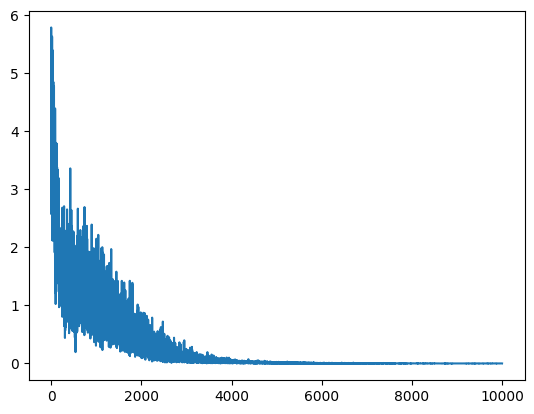

In [16]:
plt.plot(history.history["loss"])

## b)

In [17]:
loss_tracker = keras.metrics.Mean(name="loss")
class funcion2(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =10 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = 1+2*x+4*x**3


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [18]:
model2 = funcion2()
model2.add(Dense(100, activation = "tanh",input_shape=(1,)))
model2.add(Dense(50, activation = "tanh"))
model2.add(Dense(15, activation = "relu"))
model2.add(Dense(1))
model2.summary()
model2.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])
x=tf.linspace(-1,1,30)
history2 = model2.fit(x,epochs=10000,verbose=0)

Model: "funcion2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               200       
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 15)                765       
                                                                 
 dense_19 (Dense)            (None, 1)                 16        
                                                                 
Total params: 6031 (23.56 KB)
Trainable params: 6031 (23.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 53ms/step


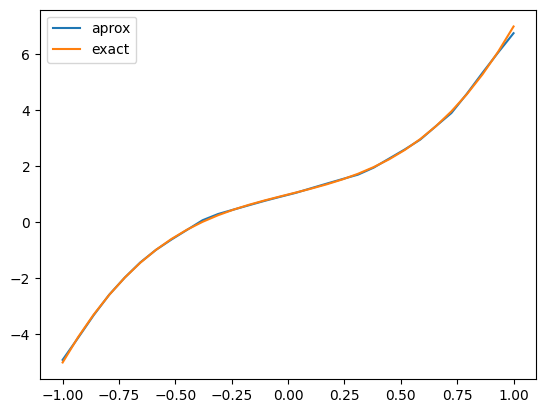

In [19]:
a=model2.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x,1+2*x+4*x**3, label="exact")

plt.legend()
plt.show()

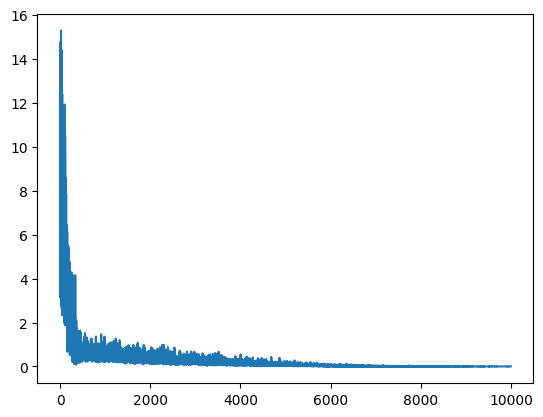

In [20]:
plt.plot(history2.history["loss"])

# 3)

In [21]:
class polyLayer(tf.keras.layers.Layer):
    def __init__(self,):
        super(polyLayer,self).__init__()


        self.potencias = tf.range(0., 4)

        self.coeficientes = self.add_weight("coeficientes", shape = [4])

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]
        self.potencias_b = tf.ones([batch,1])*self.potencias
        terms = inputs**self.potencias_b
        res = tf.tensordot(terms,self.coeficientes,1)
        return tf.expand_dims(res, axis=1)

In [22]:
loss_tracker = keras.metrics.Mean(name="loss")
class funcion3(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =10 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = tf.math.cos(2.*x)
        #f = tf.math.pow(x,2.)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [29]:
model3 = funcion3()
model3.add(Dense(60, activation = "relu", input_shape=(1,)))
model3.add(Dense(50, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(1))
model3.add(polyLayer())
model3.build(input_shape=(1,))
model3.summary()
model3.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])
x=tf.linspace(-1,1,30)
history3 = model3.fit(x,epochs=11000,verbose=0)

Model: "funcion3_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 60)                120       
                                                                 
 dense_30 (Dense)            (None, 50)                3050      
                                                                 
 dense_31 (Dense)            (None, 32)                1632      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
 poly_layer_4 (polyLayer)    (None, 1)                 4         
                                                                 
Total params: 4839 (18.90 KB)
Trainable params: 4839 (18.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 89ms/step


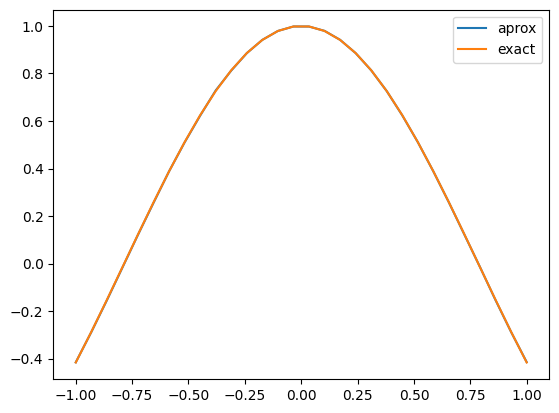

In [30]:
a=model3.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x,tf.math.cos(2.*x), label="exact")
plt.legend()
plt.show()

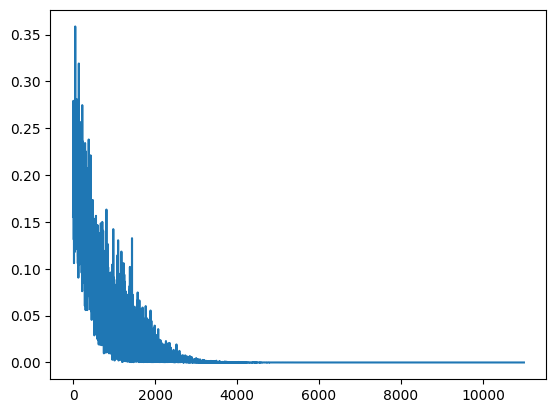

In [31]:
plt.plot(history3.history["loss"])

# 4)

## a)

In [32]:
class FirstOrderSolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = x*dy + y_pred - x**2*tf.math.cos(x)#Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 0. #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

Model: "first_order_solver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 300)               600       
                                                                 
 dense_34 (Dense)            (None, 15)                4515      
                                                                 
 dense_35 (Dense)            (None, 10)                160       
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5286 (20.65 KB)
Trainable params: 5286 (20.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


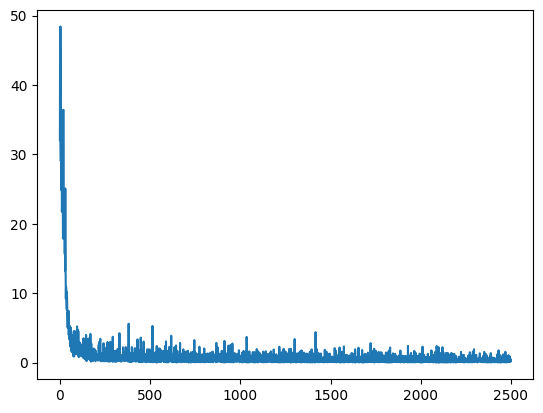

In [33]:
model4 = FirstOrderSolver()

model4.add(Dense(300, activation='tanh', input_shape=(1,)))
model4.add(Dense(15, activation='tanh', input_shape=(1,)))
model4.add(Dense(10, activation='tanh'))
model4.add(Dense(1))


model4.summary()

model4.compile(optimizer=RMSprop(),metrics=['loss'])

x=tf.linspace(-5,5,100)
history = model4.fit(x,epochs=2500,verbose=0)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 3ms/step


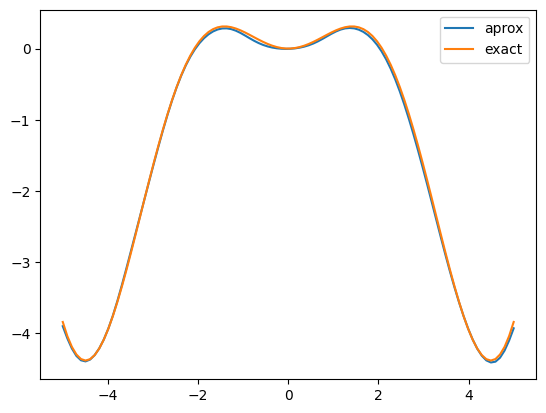

In [36]:
x_testv = tf.linspace(-5,5,100)
a=model4.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,((x**2-2)*np.sin(x))/x+2*np.cos(x),label="exact")
plt.legend()
plt.show()

## b)

In [41]:
class SecondOrdersolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape(persistent=True) as tape:
             tape.watch(x)
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
                 dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             d2y = tape.gradient(dy, x)
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             dy_o = tape.gradient(y_o, x_o)
             if(dy_o==None):
              dy_o=tf.zeros_like(y_o)
             eq = d2y + y_pred#Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             icdy = -0.5
             ic = 1. #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic) + self.mse(dy_o, icdy)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

Model: "second_ordersolver_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 300)               600       
                                                                 
 dense_55 (Dense)            (None, 100)               30100     
                                                                 
 dense_56 (Dense)            (None, 15)                1515      
                                                                 
 dense_57 (Dense)            (None, 10)                160       
                                                                 
 dense_58 (Dense)            (None, 1)                 11        
                                                                 
Total params: 32386 (126.51 KB)
Trainable params: 32386 (126.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


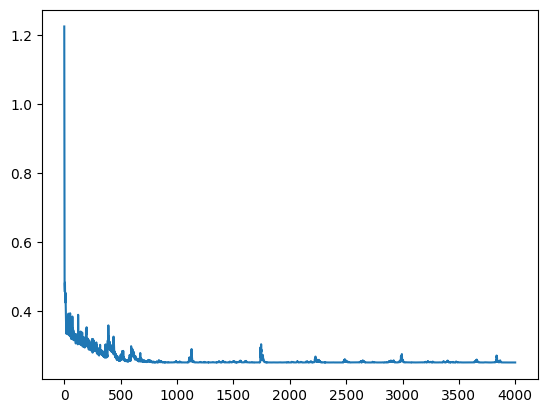

In [47]:
model5 = SecondOrdersolver()

model5.add(Dense(300, activation='tanh', input_shape=(1,)))
model5.add(Dense(100, activation='tanh'))
model5.add(Dense(15, activation='tanh'))
model5.add(Dense(10, activation='tanh'))
model5.add(Dense(1))


model5.summary()

model5.compile(optimizer=Adam(),metrics=['loss'])

x=tf.linspace(-5,5,100)
history = model5.fit(x,epochs=4000,verbose=0)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 3ms/step


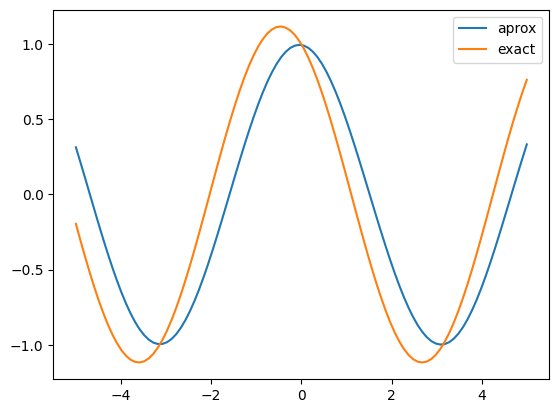

In [46]:
x_testv = tf.linspace(-5,5,100)
a=model5.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,np.cos(x)-0.5*np.sin(x),label="exact")
plt.legend()
plt.show()